In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [118]:
df = pd.read_csv("economic_index.csv")

In [119]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,1,2017,12,2.75,5.3,1464
1,2,2017,11,2.50,5.3,1394
2,3,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [120]:
## drop unnecessary column
df. drop(columns=["Unnamed: 0","year","month"],axis = 1, inplace = True)

In [121]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [122]:
## check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

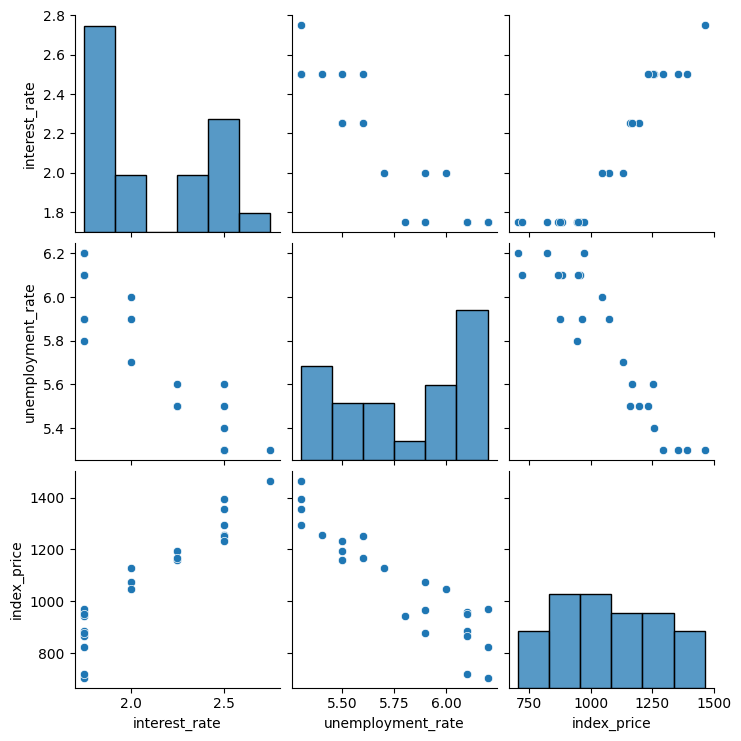

In [123]:
sns.pairplot(df)

In [124]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

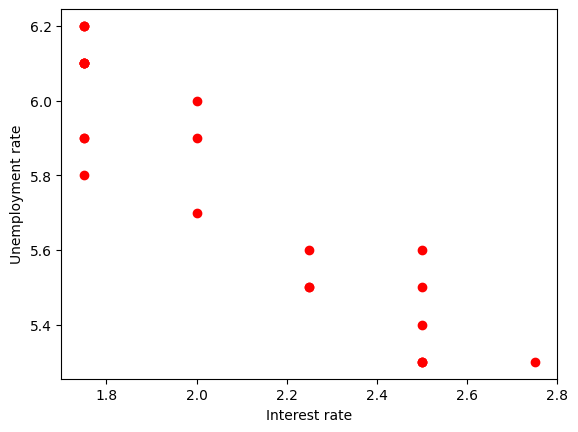

In [125]:
## visualize the data points more closely

plt.scatter(df["interest_rate"],df["unemployment_rate"], color = 'r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [126]:
## independent and dependent features
# X = df[["interest_rate",'unemployment_rate']]
## another way
X = df.iloc[:,:-1]

# y = df[['index_price']]
## another way
y = df.iloc[:,-1]

In [127]:
## train test split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [128]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


<Axes: xlabel='interest_rate', ylabel='index_price'>

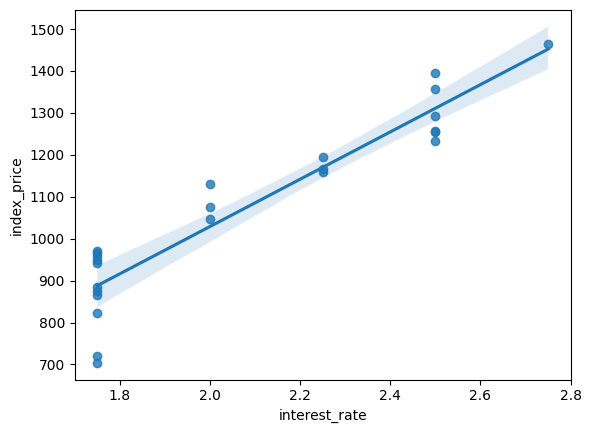

In [129]:
sns.regplot(x= df["interest_rate"],y=df["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

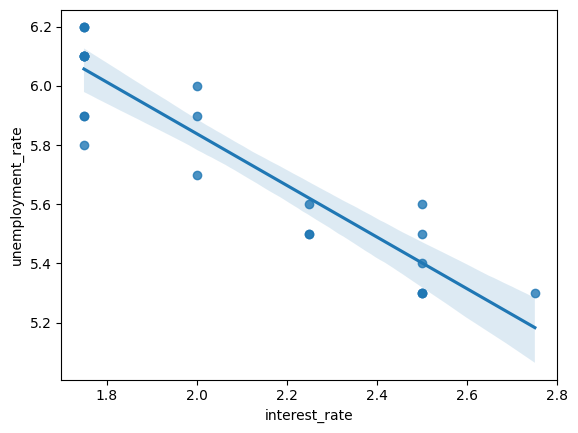

In [130]:
sns.regplot(x= df["interest_rate"],y=df["unemployment_rate"])

In [131]:
# standard scaling

scaler = StandardScaler()
scaler.fit_transform(X_train,X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [132]:
regression = LinearRegression()

In [133]:
regression.fit(X_train,y_train)

LinearRegression()

In [134]:
## cross validation

validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',
                                   cv = 3)

In [135]:
print(validation_score)
np.mean(validation_score)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


np.float64(-5914.828180162386)

In [136]:
## prediction

y_pred = regression.predict(X_test)

In [137]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [138]:
## performance metrics
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2Score = r2_score(y_test,y_pred)
print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rmse : {rmse}")
print(f"r2 : {r2Score}")

mse : 5793.762887712569
mae : 59.935781523235484
rmse : 76.11677139574805
r2 : 0.8278978091457145
